In [1]:
#Importing pandas, matplotlib.pyplot, and seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [2]:
# Loading the data
#station_data = pd.read_csv('../Capstone Project/stations.csv')
#period_of_record_data = pd.read_csv('../Capstone Project/period_of_record.csv')
lab_results_data = pd.read_csv('../Capstone Project/lab_results.csv')
field_results_data = pd.read_csv('../Capstone Project/field_results.csv',low_memory=False)

In [3]:
field_results_data.head()

,station_id,station_name,station_number,full_station_name,station_type,latitude,longitude,status,county_name,sample_code,...,sample_depth_units,anl_data_type,parameter,fdr_result,fdr_text_result,fdr_date_result,fdr_reporting_limit,uns_name,mth_name,fdr_footnote
0,12,H.O. Banks Headworks,KA000331,Delta P.P. Headworks at H.O. Banks PP,Surface Water,37.8019,-121.6203,"Public, Review Status Unknown",Alameda,OM0168A0001,...,Feet,NaN,DissolvedOxygen,9.2,NaN,NaN,0.2,mg/L,EPA 360.2 (Field),NaN
1,12,H.O. Banks Headworks,KA000331,Delta P.P. Headworks at H.O. Banks PP,Surface Water,37.8019,-121.6203,"Public, Review Status Unknown",Alameda,OM0168A0001,...,Feet,NaN,ElectricalConductance,515.0,NaN,NaN,1.0,uS/cm,Std Method 2510-B (Field),NaN
2,12,H.O. Banks Headworks,KA000331,Delta P.P. Headworks at H.O. Banks PP,Surface Water,37.8019,-121.6203,"Public, Review Status Unknown",Alameda,OM0168A0001,...,Feet,NaN,WaterTemperature,6.7,NaN,NaN,0.1,°C,EPA 170.1 (Field),NaN
3,12,H.O. Banks Headworks,KA000331,Delta P.P. Headworks at H.O. Banks PP,Surface Water,37.8019,-121.6203,"Public, Review Status Unknown",Alameda,OM0168A0001,...,Feet,NaN,pH,7.3,NaN,NaN,0.1,pH Units,EPA 150.1 (Field),NaN
4,12,H.O. Banks Headworks,KA000331,Delta P.P. Headworks at H.O. Banks PP,Surface Water,37.8019,-121.6203,"Public, Review Status Unknown",Alameda,OM0268A0006,...,Feet,NaN,DissolvedOxygen,9.7,NaN,NaN,0.2,mg/L,EPA 360.2 (Field),NaN


In [4]:
# Summary of the stations data
field_results_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 22 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   station_id           1048575 non-null  int64  
 1   station_name         1048575 non-null  object 
 2   station_number       1048575 non-null  object 
 3   full_station_name    1048575 non-null  object 
 4   station_type         1048575 non-null  object 
 5   latitude             1036785 non-null  float64
 6   longitude            1036785 non-null  float64
 7   status               1048575 non-null  object 
 8   county_name          1048575 non-null  object 
 9   sample_code          1048575 non-null  object 
 10  sample_date          1048575 non-null  object 
 11  sample_depth         589494 non-null   float64
 12  sample_depth_units   1048575 non-null  object 
 13  anl_data_type        116042 non-null   object 
 14  parameter            1048575 non-null  object 
 15

In [5]:
field_Dissolved_Oxygen_0 = field_results_data[field_results_data["parameter"]=="DissolvedOxygen"]
field_Dissolved_Oxygen_1 = field_Dissolved_Oxygen_0[field_Dissolved_Oxygen_0["fdr_result"]>0]
field_Dissolved_Oxygen = field_Dissolved_Oxygen_1[field_Dissolved_Oxygen_1["fdr_result"]<15]
field_Dissolved_Oxygen.rename(columns={'fdr_result':'Dissolved_Oxygen'}, inplace=True)

C:\Users\srzje\AppData\Local\Temp\ipykernel_19508\3208191249.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  field_Dissolved_Oxygen.rename(columns={'fdr_result':'Dissolved_Oxygen'}, inplace=True)


In [6]:
field_pH_0 = field_results_data[field_results_data["parameter"]=="pH"]
field_pH_1 = field_pH_0[field_pH_0["fdr_result"]>0]
field_pH= field_pH_1[field_pH_1["fdr_result"]<14]
field_pH.rename(columns={'fdr_result':'pH'}, inplace=True)

C:\Users\srzje\AppData\Local\Temp\ipykernel_19508\751959769.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  field_pH.rename(columns={'fdr_result':'pH'}, inplace=True)


In [7]:
field_Electrical_Conductance_0 = field_results_data[field_results_data["parameter"]=="ElectricalConductance"]
field_Electrical_Conductance_1 = field_Electrical_Conductance_0[field_Electrical_Conductance_0["fdr_result"]>0]
field_Electrical_Conductance = field_Electrical_Conductance_1[field_Electrical_Conductance_1["fdr_result"]<500]
field_Electrical_Conductance.rename(columns={'fdr_result':'Electrical_Conductance'}, inplace=True)

C:\Users\srzje\AppData\Local\Temp\ipykernel_19508\769398059.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  field_Electrical_Conductance.rename(columns={'fdr_result':'Electrical_Conductance'}, inplace=True)


In [8]:
field_Water_Temperature_0 = field_results_data[field_results_data["parameter"]=="WaterTemperature"]
field_Water_Temperature_1 = field_Water_Temperature_0[field_Water_Temperature_0["fdr_result"]>0]
field_Water_Temperature = field_Water_Temperature_1[field_Water_Temperature_1["fdr_result"]<100]
field_Water_Temperature.rename(columns={'fdr_result':'Water_Temperature'}, inplace=True)

C:\Users\srzje\AppData\Local\Temp\ipykernel_19508\1837843895.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  field_Water_Temperature.rename(columns={'fdr_result':'Water_Temperature'}, inplace=True)


In [9]:
field_Dissolved_Oxygen["Dissolved_Oxygen"].describe()

count    148811.000000
mean          8.952033
std           2.069623
min           0.010000
25%           7.900000
50%           9.080000
75%          10.200000
max          14.980000
Name: Dissolved_Oxygen, dtype: float64

In [10]:
field_pH["pH"].describe()

count    161872.000000
mean          7.706235
std           0.536912
min           0.300000
25%           7.400000
50%           7.700000
75%           8.000000
max          13.800000
Name: pH, dtype: float64

In [11]:
field_Electrical_Conductance["Electrical_Conductance"].describe().T

count    1788.000000
mean      253.226847
std       143.640666
min        19.873000
25%        98.000000
50%       270.000000
75%       390.000000
max       495.000000
Name: Electrical_Conductance, dtype: float64

In [12]:
field_Water_Temperature["Water_Temperature"].describe().T

count    229762.000000
mean         37.360305
std          25.088087
min           0.072000
25%          16.000000
50%          23.000000
75%          64.000000
max          99.500000
Name: Water_Temperature, dtype: float64

In [13]:
# Counting the missing values
missing =  pd.concat([field_Dissolved_Oxygen.isnull().sum(), 100 * field_Dissolved_Oxygen.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False)

,count,%
anl_data_type,148811,100.000000
fdr_footnote,148720,99.938849
fdr_date_result,148394,99.719779
fdr_text_result,71209,47.851973
sample_depth,62609,42.072831
fdr_reporting_limit,1690,1.135669
latitude,954,0.641082
longitude,954,0.641082
parameter,0,0.000000
mth_name,0,0.000000


In [14]:
# Counting the missing values
missing =  pd.concat([field_pH.isnull().sum(), 100 * field_pH.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False)

,count,%
anl_data_type,161872,100.000000
fdr_text_result,161791,99.949960
fdr_footnote,161789,99.948725
fdr_date_result,161485,99.760922
sample_depth,73679,45.516828
fdr_reporting_limit,1847,1.141025
latitude,754,0.465800
longitude,754,0.465800
parameter,0,0.000000
mth_name,0,0.000000


In [15]:
# Counting the missing values
missing =  pd.concat([field_Electrical_Conductance.isnull().sum(), 100 * field_Electrical_Conductance.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False)



,count,%
fdr_footnote,1788,100.000000
fdr_date_result,1788,100.000000
fdr_text_result,1788,100.000000
anl_data_type,1788,100.000000
fdr_reporting_limit,28,1.565996
station_name,0,0.000000
mth_name,0,0.000000
uns_name,0,0.000000
Electrical_Conductance,0,0.000000
parameter,0,0.000000


In [16]:
field_results_data['county_name'].value_counts()

San Joaquin        138465
Sacramento         102342
Contra Costa        94609
Solano              85767
Los Angeles         62985
Merced              36521
Butte               35716
Shasta              34265
Lake                33949
San Bernardino      31136
Riverside           26628
Humboldt            24636
Siskiyou            24375
Mendocino           23864
Kern                22229
Fresno              21535
Alameda             19806
Santa Clara         19271
Lassen              18125
Sonoma              17175
Plumas              13841
Stanislaus          12981
Glenn               12430
Imperial            11061
Colusa              10917
Monterey            10587
Placer              10204
Modoc                9945
San Diego            9051
Santa Cruz           8339
Kings                7915
El Dorado            6059
Del Norte            6007
Santa Barbara        5186
Nevada               4931
San Luis Obispo      4845
San Mateo            4097
Mono                 3915
Napa        

In [17]:
(field_results_data[field_results_data.full_station_name != field_results_data.county_name]
 .groupby('county_name')['full_station_name']
 .value_counts())

county_name  full_station_name                    
Alameda      Delta P.P. Headworks at H.O. Banks PP    6291
             South Bay Aqueduct Del Valle Check 7     2746
             Lake Del Valle at Glory Hole             2411
             ALAMEDA C NR NILES                       1638
             ARROYO VALLE NR LIVERMORE                 934
                                                      ... 
Stanislaus   STANISLAUS R A OAKDALE                      6
             STANISLAUS R A RIPON                        6
             STANISLAUS R A RIVERBANK                    6
             TUOLUMNE R A MO                             6
             CA AQUEDUCT DRAIN INLET MILE 50.14          3
Name: full_station_name, Length: 24668, dtype: int64

In [18]:
field_results_data[['full_station_name','county_name']].nunique()

full_station_name    24664
county_name             50
dtype: int64

In [19]:
# Removing rows with the lab result missed
missing_field_results = field_results_data[['fdr_result']].isnull().sum(axis=1)
missing_field_results.value_counts()/len(missing_field_results) * 100
field_results_data= field_results_data[missing_field_results != 1]

In [20]:
# Counting the missing values
missing =  pd.concat([field_results_data.isnull().sum(), 100 * field_results_data.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False)

,count,%
fdr_date_result,935598,99.683667
fdr_footnote,932043,99.304898
anl_data_type,931699,99.268246
fdr_text_result,853970,90.986578
sample_depth,395317,42.119209
fdr_reporting_limit,42926,4.573568
latitude,10537,1.122669
longitude,10537,1.122669
parameter,0,0.000000
mth_name,0,0.000000


Text(0.5, 0, 'Count')

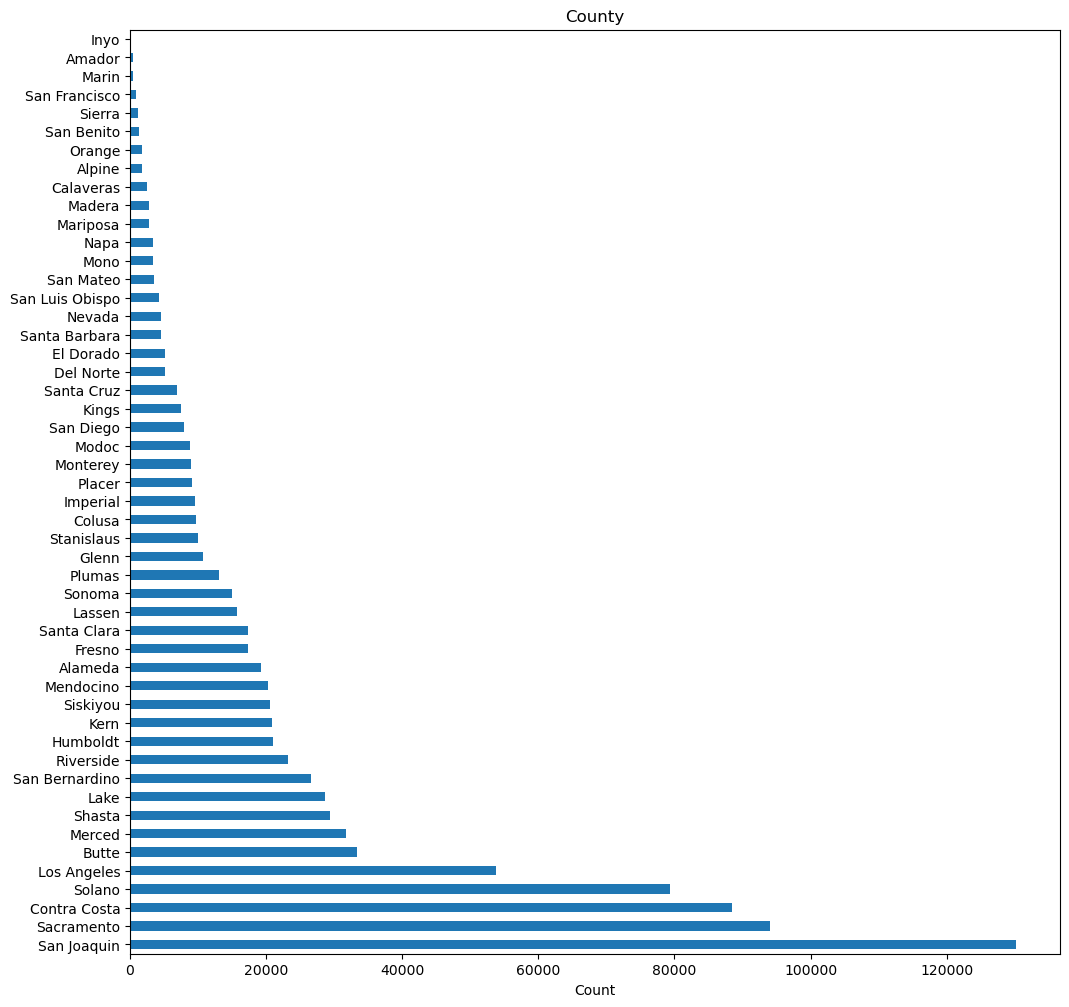

In [21]:
ax=field_results_data.county_name.value_counts().plot(kind='barh',figsize=(12,12))
ax.set_title('County')
ax.set_xlabel('Count')

In [22]:
field_rsults_pH_mean= field_pH.groupby('county_name')[['pH']].mean()
field_rsults_do_mean= field_Dissolved_Oxygen .groupby('county_name')[['Dissolved_Oxygen']].mean()
field_results_ec_mean= field_Electrical_Conductance.groupby('county_name')[['Electrical_Conductance']].mean()
field_results_tem_mean= field_Water_Temperature.groupby('county_name')[['Water_Temperature']].mean()

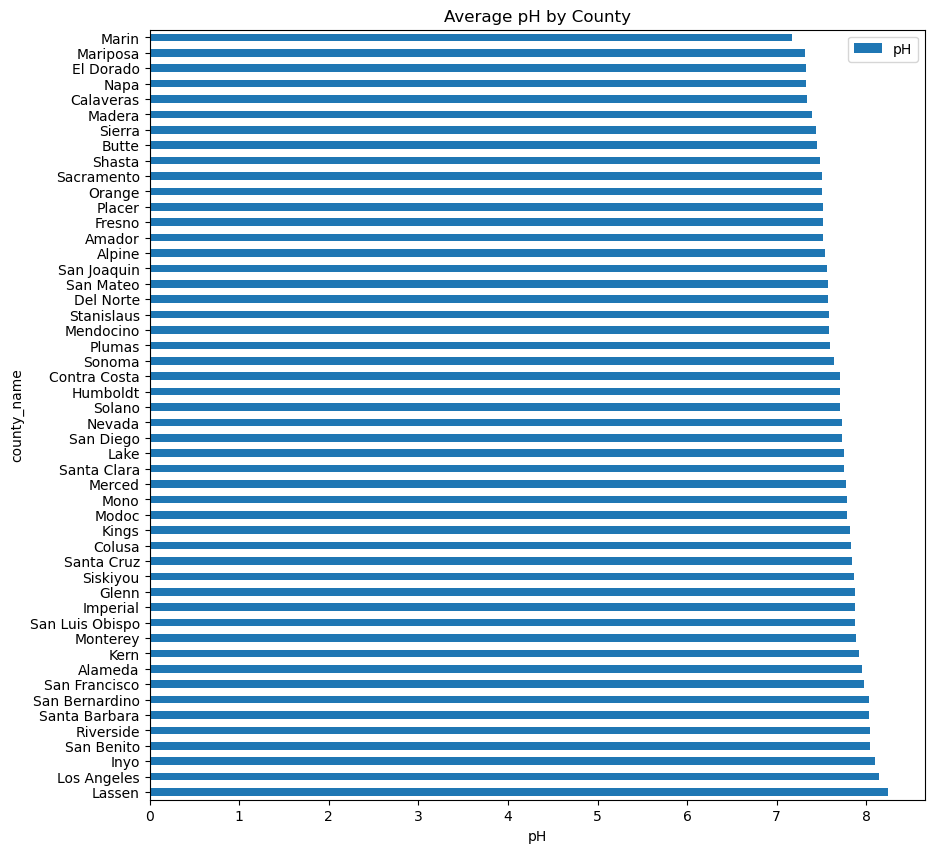

In [23]:
(field_rsults_pH_mean.reindex(index=field_rsults_pH_mean.mean(axis=1)
                              .sort_values(ascending=False)
                              .index).plot(kind='barh', figsize=(10, 10), title='Average pH by County'))
plt.xlabel('pH');
 
 

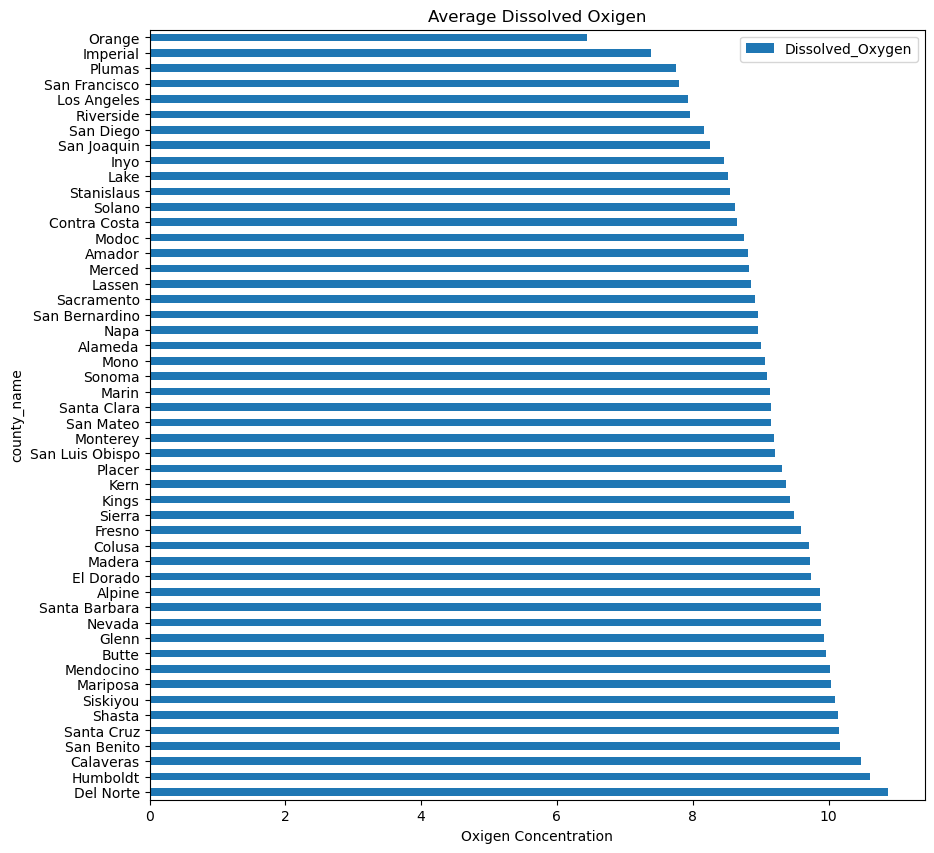

In [24]:
(field_rsults_do_mean.reindex(index=field_rsults_do_mean.mean(axis=1)
                              .sort_values(ascending=False)
                              .index).plot(kind='barh', figsize=(10, 10), title='Average Dissolved Oxigen'))
plt.xlabel('Oxigen Concentration');

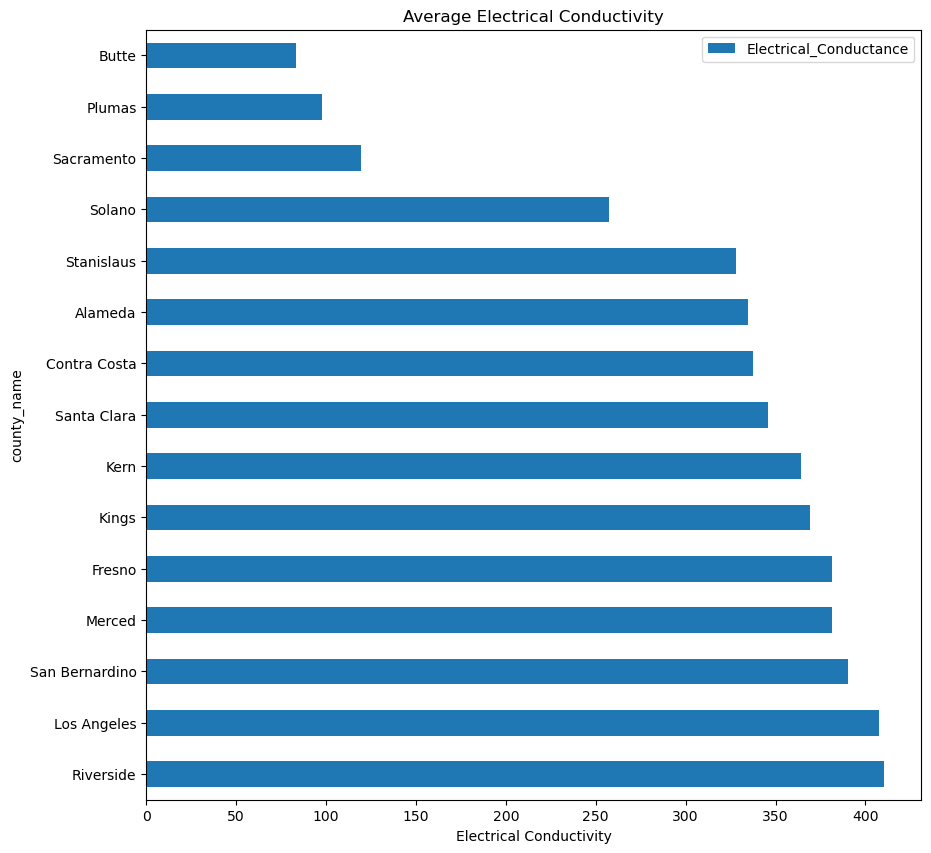

In [25]:
(field_results_ec_mean.reindex(index=field_results_ec_mean.mean(axis=1)
                              .sort_values(ascending=False)
                              .index).plot(kind='barh', figsize=(10, 10), title='Average Electrical Conductivity'))
plt.xlabel('Electrical Conductivity');

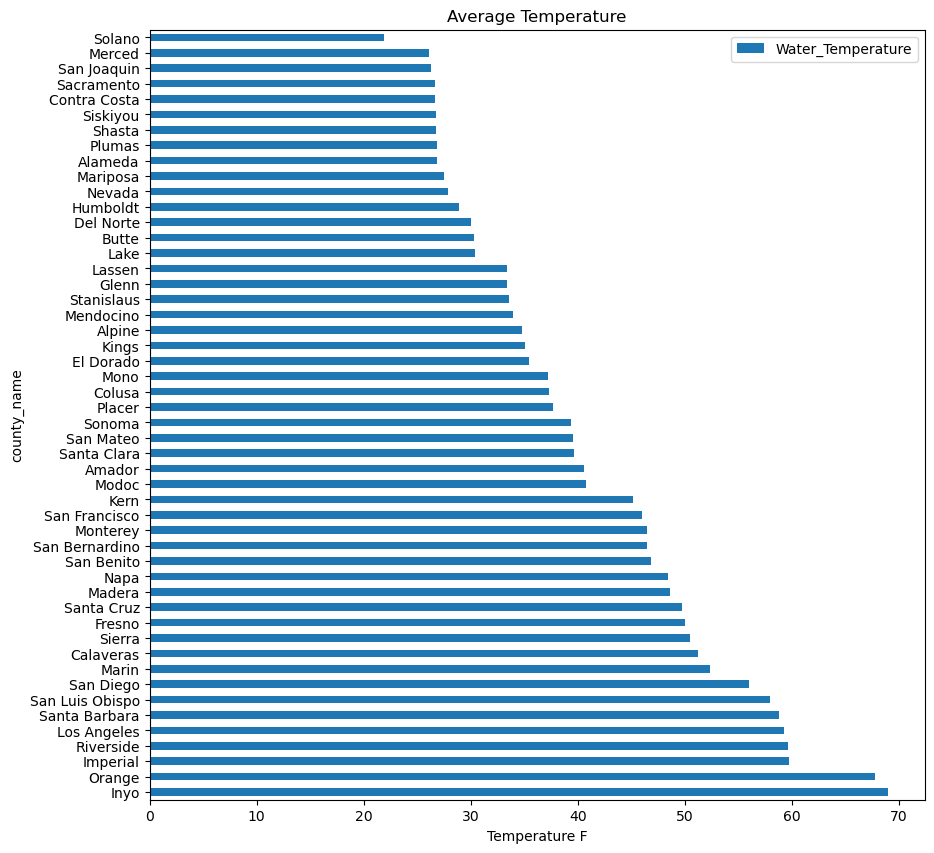

In [26]:
(field_results_tem_mean.reindex(index=field_results_tem_mean.mean(axis=1)
                              .sort_values(ascending=False)
                              .index).plot(kind='barh', figsize=(10, 10), title='Average Temperature'))
plt.xlabel('Temperature F');

In [27]:
ph=pd.melt(field_pH[['county_name','pH']],
          id_vars= 'county_name', 
                        var_name='parameter', 
                        value_vars=['pH'], 
                        value_name='pH')
ph.head()

C:\Users\srzje\AppData\Local\Temp\ipykernel_19508\1122437019.py:1: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  ph=pd.melt(field_pH[['county_name','pH']],


,county_name,parameter,pH
0,Alameda,pH,7.3
1,Alameda,pH,7.5
2,Alameda,pH,7.6
3,Alameda,pH,7.5
4,Alameda,pH,7.5


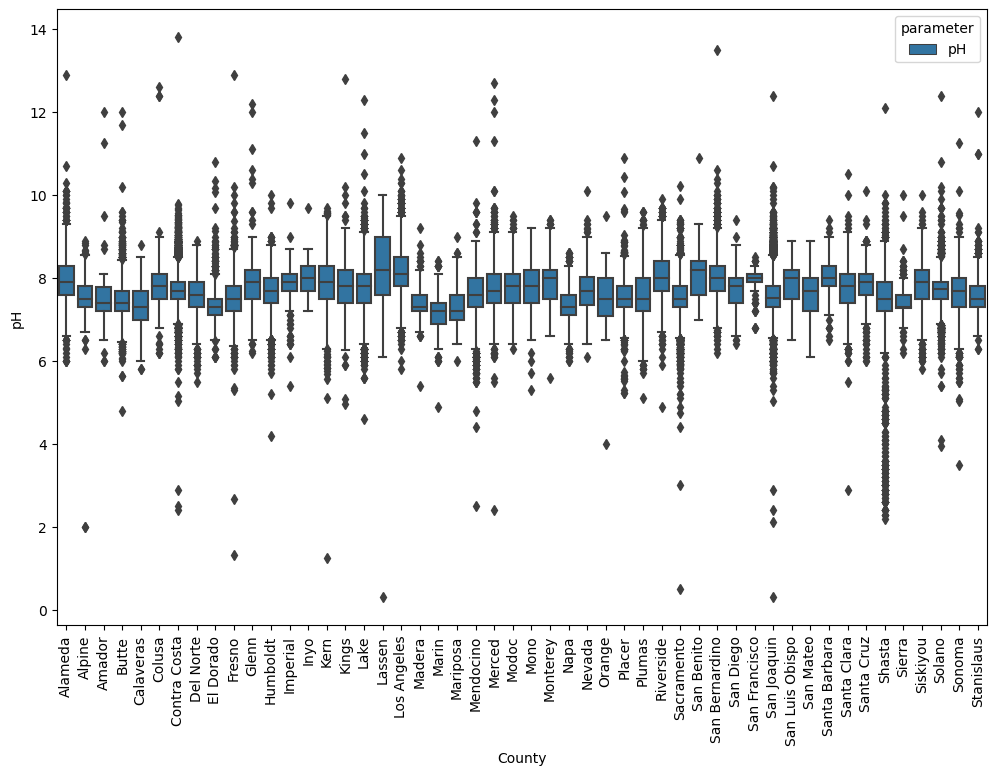

In [28]:
plt.subplots(figsize=(12, 8))
sns.boxplot(x='county_name', y='pH', hue='parameter', data=ph)
plt.xticks(rotation='vertical')
plt.ylabel('pH')
plt.xlabel('County');

In [29]:
do=pd.melt(field_Dissolved_Oxygen[['county_name','Dissolved_Oxygen']],
          id_vars= 'county_name', 
                        var_name='parameter', 
                        value_vars=['Dissolved_Oxygen'], 
                        value_name='Dissolve O')
do.head()

,county_name,parameter,Dissolve O
0,Alameda,Dissolved_Oxygen,9.2
1,Alameda,Dissolved_Oxygen,9.7
2,Alameda,Dissolved_Oxygen,7.6
3,Alameda,Dissolved_Oxygen,7.0
4,Alameda,Dissolved_Oxygen,8.2


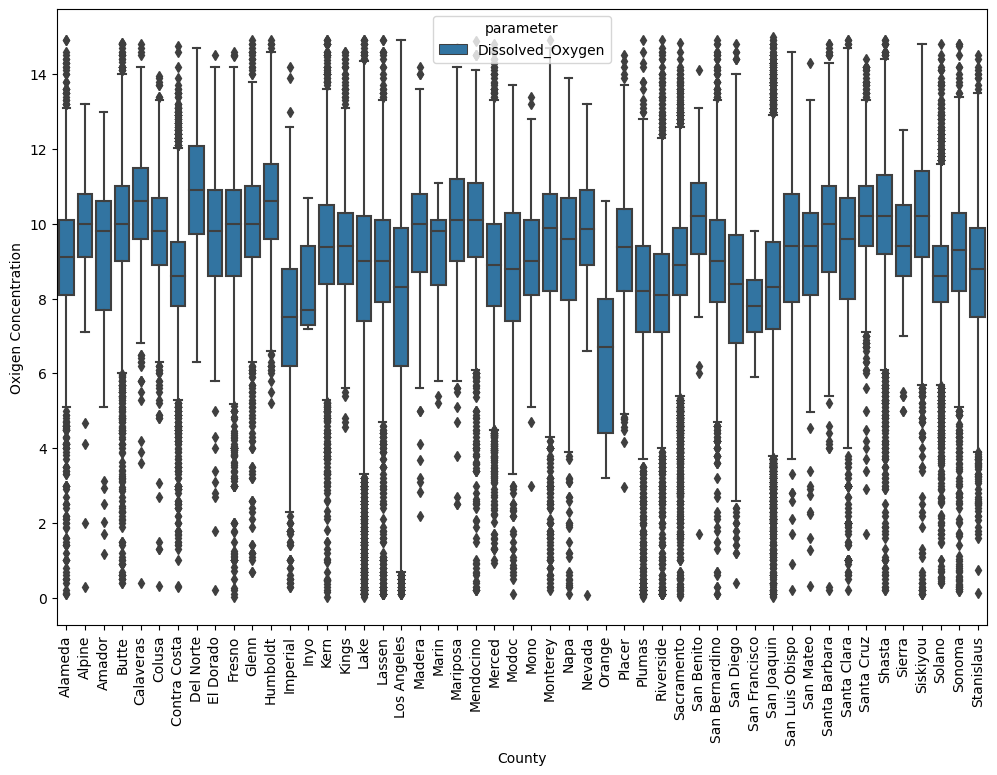

In [30]:
plt.subplots(figsize=(12, 8))
sns.boxplot(x='county_name', y='Dissolve O', hue='parameter', data=do)
plt.xticks(rotation='vertical')
plt.ylabel('Oxigen Concentration')
plt.xlabel('County');

In [31]:
df=pd.concat([field_Dissolved_Oxygen, field_pH,field_Electrical_Conductance,field_Water_Temperature], axis=0, ignore_index=True)


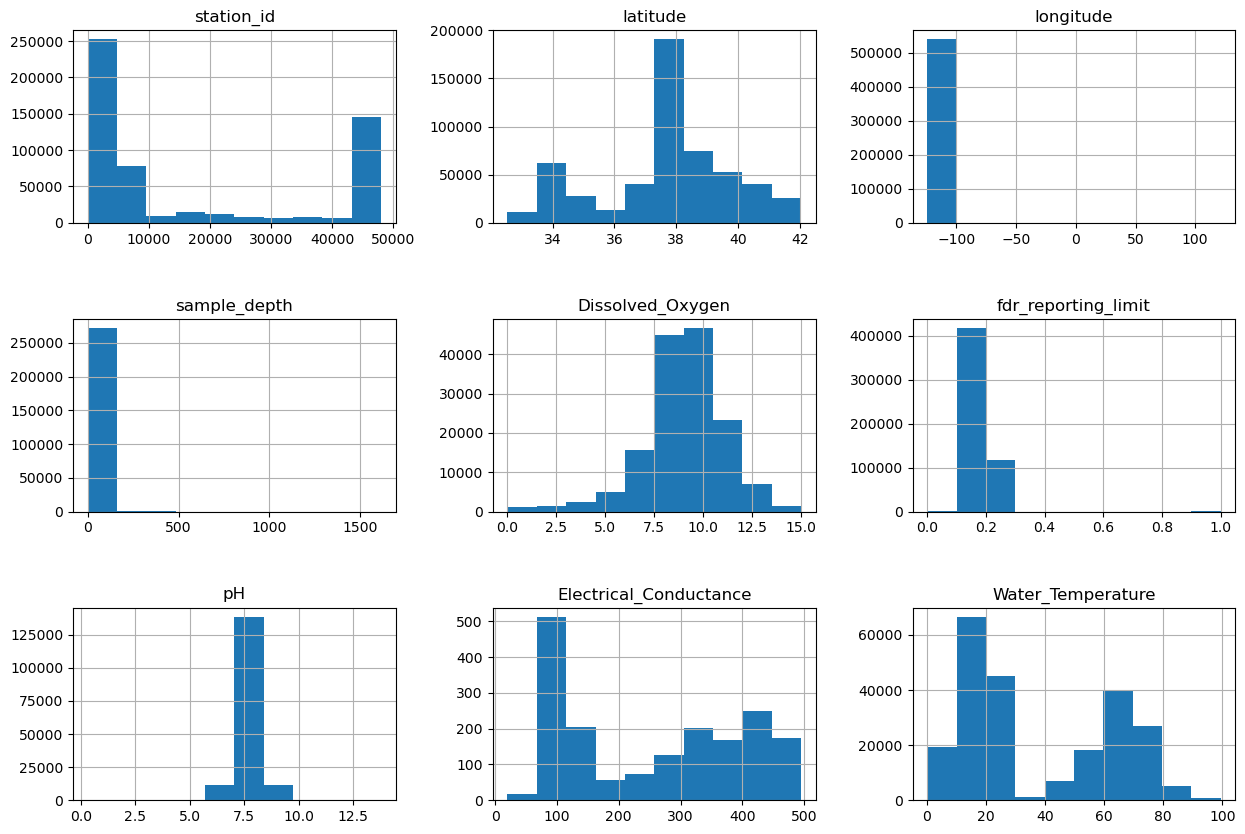

In [32]:
df.hist(figsize = (15,10))
plt.subplots_adjust(hspace=0.5);